In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")


In [11]:
import os
os.getlogin()


'bhumikapatil'

In [13]:
df = pd.read_csv("/Users/bhumikapatil/Downloads/student_performance.csv")


In [15]:
import os
os.path.exists("/Users/bhumikapatil/Downloads/student_performance.csv")


True

In [17]:
os.getcwd()


'/Users/bhumikapatil'

In [25]:
df = pd.read_csv("/Users/bhumikapatil/Desktop/student_performance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.columns = [
    "gender",
    "race_ethnicity",
    "parental_education",
    "lunch",
    "test_prep",
    "math_score",
    "reading_score",
    "writing_score"
]

df.head()


,gender,race_ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df.shape


(1000, 8)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race_ethnicity      1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_prep           1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [33]:
df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
df.isnull().sum()


gender                0
race_ethnicity        0
parental_education    0
lunch                 0
test_prep             0
math_score            0
reading_score         0
writing_score         0
dtype: int64

In [37]:
df.drop_duplicates(inplace=True)


In [39]:
df["total_score"] = (
    df["math_score"] +
    df["reading_score"] +
    df["writing_score"]
)


In [41]:
def performance_level(score):
    if score >= 240:
        return "High"
    elif score >= 180:
        return "Medium"
    else:
        return "Low"

df["performance_level"] = df["total_score"].apply(performance_level)


In [43]:
gender_avg = df.groupby("gender")[["math_score", "reading_score", "writing_score"]].mean()
gender_avg


,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


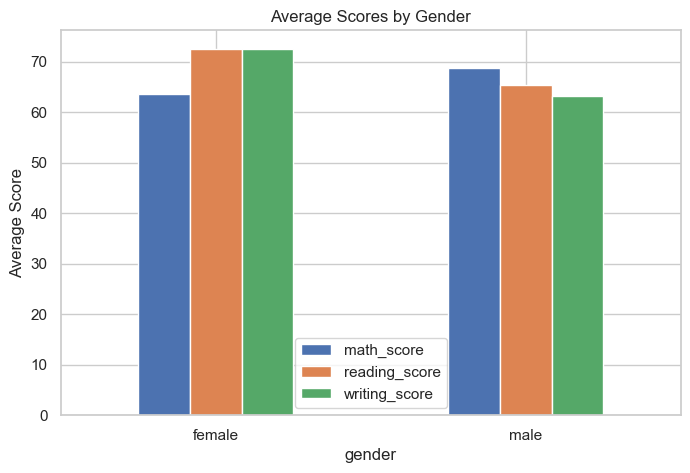

In [45]:
gender_avg.plot(kind="bar", figsize=(8,5))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()


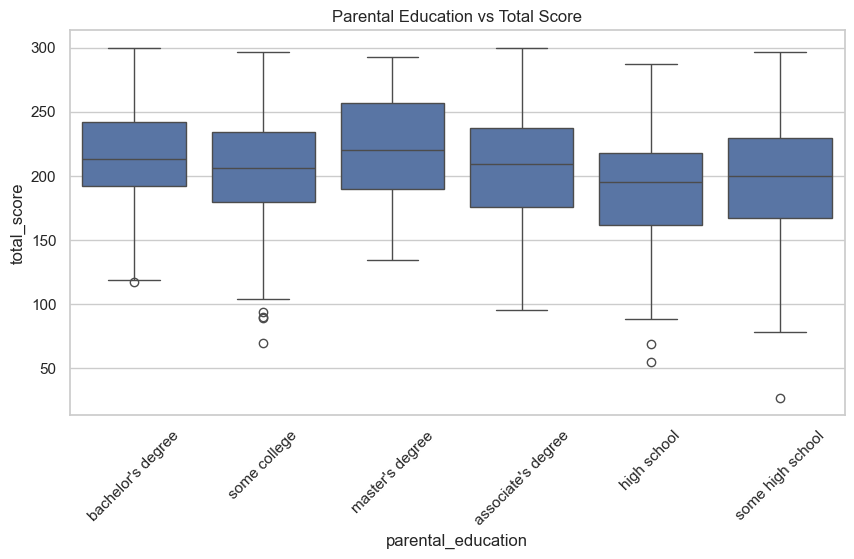

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x="parental_education", y="total_score", data=df)
plt.xticks(rotation=45)
plt.title("Parental Education vs Total Score")
plt.show()


In [49]:
prep_avg = df.groupby("test_prep")["total_score"].mean()
prep_avg


test_prep
completed    218.008380
none         195.116822
Name: total_score, dtype: float64

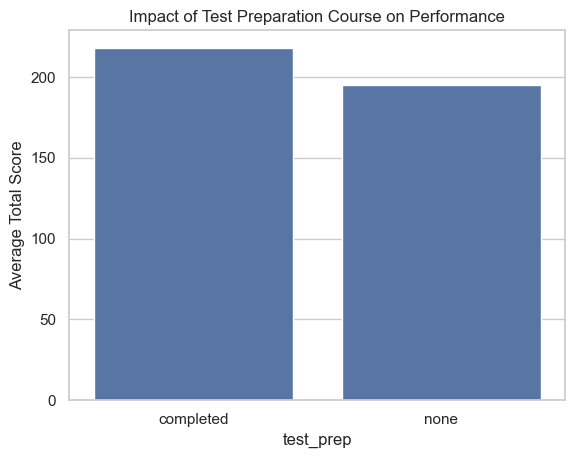

In [51]:
sns.barplot(x=prep_avg.index, y=prep_avg.values)
plt.title("Impact of Test Preparation Course on Performance")
plt.ylabel("Average Total Score")
plt.show()


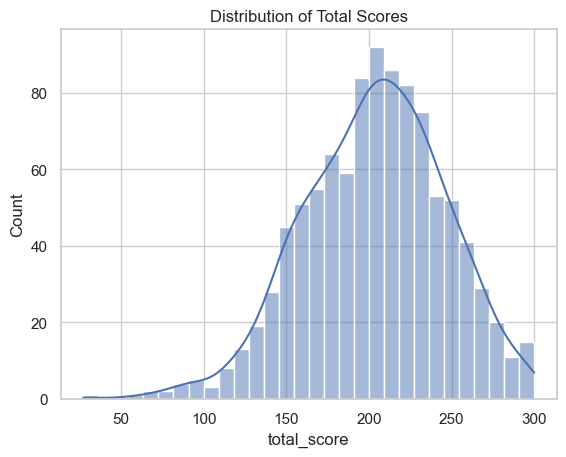

In [53]:
sns.histplot(df["total_score"], bins=30, kde=True)
plt.title("Distribution of Total Scores")
plt.show()


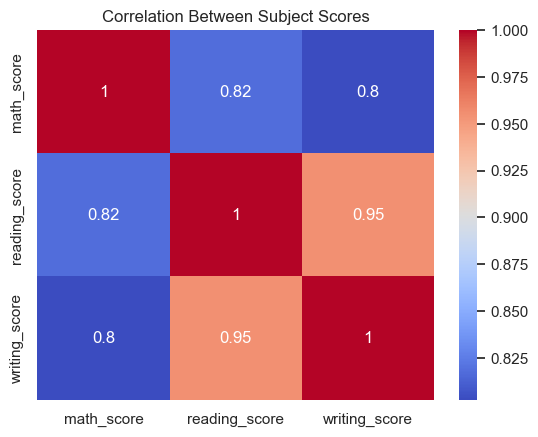

In [55]:
sns.heatmap(
    df[["math_score", "reading_score", "writing_score"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Subject Scores")
plt.show()


In [57]:
df["at_risk"] = df["performance_level"].apply(
    lambda x: "Yes" if x == "Low" else "No"
)


In [59]:
df["at_risk"].value_counts()


at_risk
No     715
Yes    285
Name: count, dtype: int64

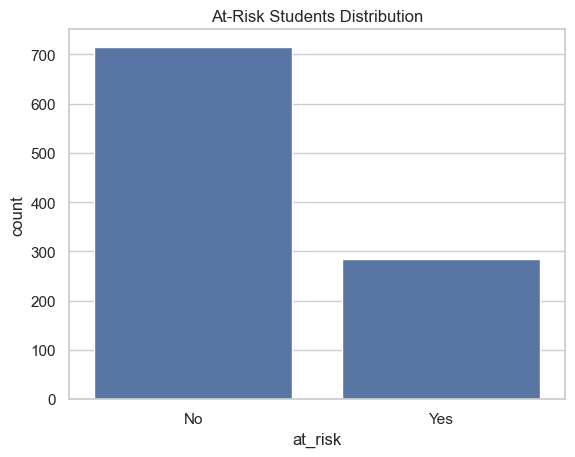

In [61]:
sns.countplot(x="at_risk", data=df)
plt.title("At-Risk Students Distribution")
plt.show()


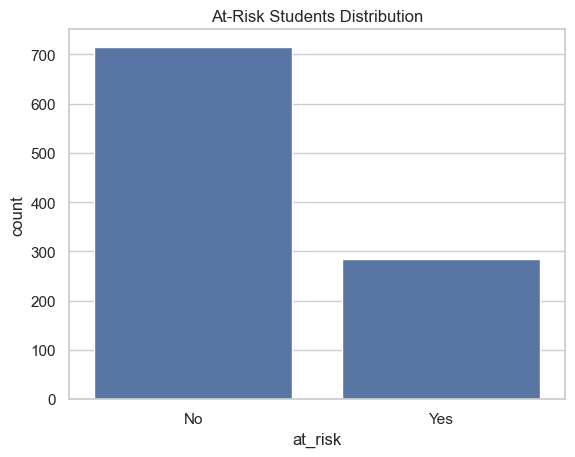

In [63]:
sns.countplot(x="at_risk", data=df)
plt.title("At-Risk Students Distribution")
plt.show()


In [65]:
recommendations = [
    "Encourage students to enroll in test preparation programs",
    "Provide academic support for low-performing students",
    "Introduce mentoring for students from lower educational backgrounds",
    "Use early performance indicators to reduce failure risk"
]

for r in recommendations:
    print("-", r)


- Encourage students to enroll in test preparation programs
- Provide academic support for low-performing students
- Introduce mentoring for students from lower educational backgrounds
- Use early performance indicators to reduce failure risk


This analysis highlights key academic and socio-economic factors affecting student performance.
The insights can help educational institutions design targeted interventions to improve outcomes
and reduce academic risk.


# Student Performance Analysis

## Objective
Analyze student academic performance and identify factors affecting outcomes
using exploratory data analysis.

## Dataset
Source: Kaggle – Students Performance in Exams

## Tools & Technologies
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Jupyter Notebook

## Key Insights
- Students completing test preparation courses scored higher
- Parental education impacts performance
- Reading and writing scores are strongly correlated
- Low-performing students can be identified using total score analysis

## Recommendations
- Promote test preparation programs
- Provide academic support to low-performing students
- Introduce mentoring initiatives

## Author
Bhumika Patil
